## Import of Libraries

In [1]:
import plotly.graph_objects as go
import pandas as pd
import json
from io import StringIO

In [3]:
from langchain.schema import HumanMessage, SystemMessage
from langchain_community.chat_models import  ChatOpenAI
from loguru import logger
import os


## Plotly class

In [4]:
def model_response(query:str):
    chat = ChatOpenAI(model="gpt-3.5-turbo",
                    temperature = 0,
                    model_kwargs= {
                    "response_format": {"type": "json_object"},
                    "seed" : 42})

    messages = [
        SystemMessage(
            content="You are a business analyst designed to give key insights,designed to output json"),
        HumanMessage(
            content=query),
    ]
    return json.loads(chat(messages).content)

In [27]:
class PlotlyGraph:
    def __init__(self):
        self.chart_methods = {
            'bar': self.bar,
            'grouped_bar': self.grouped_bar,
            'line': self.line,
            'scatter': self.scatter,
            'heatmap': self.heatmap,
            'area line': self.area_line,
            'surface_area': self.area_line,
            'multiline': self.multiline,
            'multi_line': self.multiline,
            'scattercarpet': self.scattercarpet,
            'stacked_bar': self.stacked_bar,
            'pie': self.pie,
            'area': self.area
        }

    def generate_plotly_graph(self, data_dict, additional_params=None):
        # Extract information from the dictionary
        x_axis = data_dict['x_axis']
        y_axis = data_dict['y_axis']
        chart_type = data_dict['chart_type']
        df_str = data_dict['resultant_df']
        group_by = data_dict.get("group_by", None)
      
        if isinstance(df_str, str):
            df = pd.read_csv(StringIO(df_str))
        else:
            df = df_str

        fig = go.Figure()

        chart_method = self.chart_methods.get(chart_type)
        if chart_method:
            return chart_method(df, x_axis, y_axis, group_by, additional_params)
        else:
            raise ValueError(f"Unsupported chart type: {chart_type}")
    
    def bar(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Bar(x=group[x_axis], y=group[y_axis], name=y_axis))
        else:
            fig.add_trace(go.Bar(x=df[x_axis], y=df[y_axis]))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    
    def grouped_bar(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        df = df.sort_values(by=y_axis, ascending=False)
        for col in df.columns:
            if col != x_axis:
                fig.add_trace(go.Bar(x=df[x_axis], y=df[col], name=col))
        barmode = additional_params.get('barmode') if additional_params else 'stack'
        try:
            for login_type in df[group_by].unique():
                fig.add_trace(go.Bar(x=df[df[group_by] == login_type][x_axis],
                            y=df[df[group_by] == login_type][y_axis],
                            name=login_type))
        except Exception:
            fig.add_trace(go.Bar(x=df[x_axis], y=df['count'], name='count'))
        
        fig.update_layout(barmode='group',
                      xaxis_title=x_axis,
                      yaxis_title=y_axis,
                      legend_title=group_by)
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

  
    def line(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Scatter(x=group[x_axis], y=group[y_axis], mode='lines', name=name))
        else:
            # Create a standard line chart
            fig.add_trace(go.Scatter(x=df[x_axis], y=df[y_axis], mode='lines'))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def scatter(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Scatter(x=group[x_axis], y=group[y_axis], mode='markers', name=name))
        else:
            # Create a standard scatter plot
            fig.add_trace(go.Scatter(x=df[x_axis], y=df[y_axis], mode='markers'))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def heatmap(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        fig.add_trace(go.Heatmap(z=df[y_axis], x=df[x_axis], y=df.index))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def area_line(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Scatter(x=group[x_axis], y=group[y_axis], fill='tozeroy', name=name))
        else:
            fig.add_trace(go.Scatter(x=df[x_axis], y=df[y_axis], fill='tozeroy'))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def multiline(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Scatter(x=group[x_axis], y=group[y_axis], mode='lines', name=name))
        else:
            fig.add_trace(go.Scatter(x=df[x_axis], y=df[y_axis], mode='lines'))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def scattercarpet(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Scattercarpet(a=group[x_axis], b=group[y_axis], name=name))
        else:
            fig.add_trace(go.Scattercarpet(a=df[x_axis], b=df[y_axis]))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def stacked_bar(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        for col in df.columns:
            if col != x_axis:
                fig.add_trace(go.Bar(x=df[x_axis], y=df[col], name=col, text=df[col], textposition='auto'))
        barmode = additional_params.get('barmode') if additional_params else 'stack'
        if barmode:
            fig.update_layout(barmode=barmode)
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def pie(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        df = df.sort_values(by=y_axis, ascending=False)
        labels, values = list(df[x_axis]), list(df[y_axis])
        if len(labels) > 6:
            top_labels = labels[:6]
            top_values = values[:6]
            others_label = 'Others'
            others_value = sum(values[6:])
            top_labels.append(others_label)
            top_values.append(others_value)
            fig.add_trace(go.Pie(labels=top_labels, values=top_values))
        else:
            fig.add_trace(go.Pie(labels=labels, values=values))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())

    def area(self, df, x_axis, y_axis, group_by, additional_params=None):
        fig = go.Figure()
        if group_by:
            for name, group in df.groupby(group_by):
                fig.add_trace(go.Scatter(x=group[x_axis], y=group[y_axis], fill='tonexty', name=name))
        else:
            fig.add_trace(go.Scatter(x=df[x_axis], y=df[y_axis], fill='tonexty'))
        fig.update_layout(margin={'pad': 20}, xaxis_title=x_axis, yaxis_title=y_axis)
        fig.show()
        return json.loads(fig.to_json())


In [6]:
def give_chart_type(question:str,dfs_head) -> str:
        prompt = '''
        Given the following set heads of the datasetand the query:
        There are three types of query classifications for visualization:
        
        time_series: Analyzing time series trends. Graph type: Line.
        Example: "Give me sales trend."
        group_aggregates: Analyzing over different product categories. Graph types: Bar, Pie,stacked_bar
        Example: "Give me sales for each product category."
        combination: A combination of time_series and group_aggregates.Where query is requoring Analysis of time series trends for each group category. Graph type: multiline.
        Example: 1.Give me product wise sales trend ,
                 2. sales trend for each vehicle_type

        Result Format:{{
        "is_chart_possible": "Yes/No (if the query is related to the head of the dataset, then Yes; else, No)",
        "tables": ["list of tables required for the visualization"],
        "join": {{"left_on": "column for left on in case of pd.merge","right_on": "column for right on in case of pd.merge"}},"type": "time_series/group_aggregates/combination",
        "chart_type": type of chart suitable for this visualization(like line/multiline/bar/pie etc.)"}}
        only return the result dict, I must be directly able to convert it to json

        **Important Instruction**
        - is_chart_possible should be no if and only if the visualization for the query is can't be categorized in time_series,group aggregates,combination
        
        ```
        Examples:
        For the given Head of the datasets
        {{'sales_data': ['date', 'product_id', 'sales_amount'],'product_categories': ['product_id','category']}}

        Query: "Give me sales trend." 
        Result: {{"is_chart_possible": "Yes","tables": ["sales_data"],"join": {{"left_on":"","right_on":""}},"type": "time_series","chart_type": "line"}}

        Query: "Give me sales for each product category."
        Result: {{"is_chart_possible": "Yes","tables": ["sales_data", "product_categories"],"join": {{"left_on": "product_id", "right_on": "product_id"}},"type": "group_aggregates","chart_type": "bar"}}

        Query: "Give me sales trend for each product category."
        Result: {{"is_chart_possible": "Yes","tables": ["sales_data", "product_categories"],"join": {{"left_on": "product_id", "right_on": "product_id"}},"type": "combination","chart_type": "multiline"}}

        Query: "Give me profit per product."
        Result: {{"is_chart_possible": "No","tables": [],"join": {{"left_on":"","right_on":""}},"type": "","chart_type": ""}}

        ```
        Head of the datasets: {dfs_head}
        query: {question}
        Result:
        '''
        final_prompt = prompt
        return final_prompt.format(dfs_head=dfs_head,question=question)

In [7]:
def generate_chart_config(chart_class, question: str, df_head,column_description:str = ""):
    prompt = '''
        For a given query:  on the given  dataset and type of the visualization: , we are required to plot the given visualization , return chart config in the format below:

        chart_config: {{"x_axis":column of the dataset(it should be a column present in the dataset) to be on x_axis for the given visualization,"y_axis":column of the dataset to be on the y_axis,binning:only fill in case of time series or combinations its either yearly or monthly,heading:The heading for the visualization,group_by:column of the dataset on which grouping is to be done(Leave Blank For Time series, make sure it is a column present in the dataset),operation:infer this from the question, it is either mean,max,sum,chart_type:the chart type to be used for visualization(eg. bar/line/multiline)}}
        **Important**
        - Make Sure x and y axis values are present in the columns of the dataset
        - binning parameter is mandatory for time series and combination types
        ```
        Examples:
        Head of the dataset
        date, product_id, sales_amount, category
        21/08/2022, 123, 12233, grocery
        
        Query: "Give me sales trend for each product category."
        Chart Class: {{"chart_type": "multiline", "type": "combination"}}
        Result: {{"x_axis": "date", "y_axis": "sales_amount", "binning": "monthly", "heading": "Sales Trend for Each Product Category", "group_by": "category", "operation": "sum", "chart_type": "multiline", "start_date": None, "end_date": None}}
        
        Query: "Give me sales for each product category."
        Chart Class: {{"chart_type": "bar", "type": "group_aggregates"}}
        Result: {{"x_axis": "category", "y_axis": "sales_amount", "binning": "", "heading": "Sales for Each Product Category", "group_by": "", "operation": "sum", "chart_type": "bar", "start_date": None, "end_date":None}}
        
        Query: "Give me sales for each product category. from 2018 -2020"
        Chart Class: {{"chart_type": "multiline", "type": "combination"}}
        Result:{{"x_axis": "date", "y_axis": "sales_amount", "binning": "monthly", "heading": "Sales Trend for Each Product Category", "group_by": "category", "operation": "sum", "chart_type": "multiline", "start_date": "2018-01-01", "end_date": "2020-12-31"}}
        ```
        column descriptions : {column_description} (if empty use youre understanding of data)
        Head of the dataset: {df_head}
        Query:{question}
        chart_class:{chart_class}
        Result:
        '''
    return prompt.format(df_head=df_head, question=question, chart_class=chart_class,column_description=column_description)

In [8]:
class PandasResultantDataframe:
    '''
    class to execute required pandas code
    '''

    def __init__(self, chart_config, df,filter_columns):
        self.chart_config = chart_config
        self.df2 = df
        self.freq_dict = {'business_day': 'B', 'calendar_day': 'D', 'weekly': 'W', 'monthly': 'M', 'quarterly': 'Q',
                          'yearly': 'A', 'hourly': 'H', 'minutely': 'T', 'secondly': 'S', 'milliseconds': 'L',
                          'microseconds': 'U', 'nanoseconds': 'N'}
        self.filter_columns = filter_columns
    def _apply_filters(self,df):
      
        # Apply filters for numerical columns
        for col, conditions in self.filter_columns.get('numerical_columns', {}).items():
            start_value = conditions.get('start_value')
            end_value = conditions.get('end_value')
            if start_value is not None:
                df = df[df[col] >= start_value]
            if end_value is not None:
                df = df[df[col] <= end_value]
        
        # Apply filters for date columns
        for col, conditions in self.filter_columns.get('date_columns', {}).items():
            start_date = conditions.get('start_date')
            end_date = conditions.get('end_date')
            if start_date and end_date:
                df[col] = pd.to_datetime(df[col])
                df = df[(df[col] >= pd.to_datetime(start_date)) & (df[col] <= pd.to_datetime(end_date))]
            elif start_date:
                df = df[df[col] >= pd.to_datetime(start_date)]
            elif end_date:
                df = df[df[col] <= pd.to_datetime(end_date)]
        
        # Apply filters for categorical columns
        for col, values in self.filter_columns.get('categorical_columns', {}).items():
            if values:
                df = df[df[col].isin(values)]
        
        return df

    def time_series_resultant_df(self):
        x_axis = self.chart_config['x_axis']
        y_axis = self.chart_config['y_axis'] 
        operation = self.chart_config.get('operation', "mean")
        df1 = self._apply_filters(self.df2.copy())
        if "binning" in self.chart_config.keys():
            binning = self.chart_config['binning']  ## yearly, monthly, daily
            if binning !='':
                binning = 'monthly'
        elif df1.shape[0]> 720:
            binning = 'yearly'
        elif df1.shape[0] >60:
            binning = 'monthly'
        else:
            binning = 'daily'
    
        if df1[x_axis].dtype != "int64":
            df1[x_axis] = pd.to_datetime(df1[x_axis])
            df1[binning] = df1[x_axis].dt.to_period(self.freq_dict[binning]).dt.to_timestamp()
            resultant_df = df1.groupby(binning)[y_axis].agg(operation)
        else:
            resultant_df = df1.groupby(x_axis)[y_axis].agg(operation)
        resultant_df = resultant_df.reset_index()
        resultant_df.columns = [x_axis, y_axis]
        return resultant_df

    def group_aggregates_resultant_df(self):
        x_axis = self.chart_config['x_axis']
        y_axis = self.chart_config['y_axis']
        operation = self.chart_config.get('operation', "mean")
        df1 = self._apply_filters(self.df2.copy())
        resultant_df = df1.groupby(x_axis)[y_axis].agg(operation).reset_index()

        return resultant_df

    def combination_resultant_df(self):
        chart_config = self.chart_config
        df1 = self._apply_filters(self.df2.copy())
        x_axis = chart_config['x_axis']
        y_axis = chart_config['y_axis']
        group_by = chart_config['group_by']
        if "binning" in self.chart_config.keys():
            binning = self.chart_config['binning']  ## yearly, monthly, daily
            if binning !='':
                binning = 'monthly'
        elif df1.shape[0]> 720:
            binning = 'yearly'
        elif df1.shape[0] >60:
            binning = 'monthly'
        else:
            binning = 'daily'
        
        operation = self.chart_config.get('operation', "mean")

        df1[x_axis] = pd.to_datetime(df1[x_axis])
        # df1[binning] = df1[x_axis].dt.to_period(self.freq_dict[binning])
        df1[binning] = df1[x_axis].dt.strftime('%Y-%m')
        resultant_df = df1.groupby([binning, group_by])[y_axis].agg(operation).unstack().reset_index()
        resultant_df = resultant_df.melt(id_vars=[binning], var_name=group_by, value_name=y_axis)
        resultant_df.columns = [x_axis, group_by, y_axis]

        return resultant_df


In [67]:
global_stock = pd.read_csv("BankCustomer_dataset.csv")
query = "Trend Analysis customers for each tenure?"
global_stock_head = global_stock.head().to_csv(index = False)

In [68]:
chart_class = model_response(give_chart_type(query,global_stock_head))

In [69]:
chart_class

{'is_chart_possible': 'No',
 'tables': [],
 'join': {'left_on': '', 'right_on': ''},
 'type': '',
 'chart_type': ''}

In [60]:
chart_config = model_response(generate_chart_config(chart_class,query,global_stock_head))
chart_config

{'chart_config': {'x_axis': 'country',
  'y_axis': 'credit_score',
  'binning': 'monthly',
  'heading': 'Trend Analysis of Credit Scores by Country',
  'group_by': '',
  'operation': 'mean',
  'chart_type': 'line'}}

In [65]:
chart_config = {'x_axis': 'country',
  'y_axis': 'credit_score',
  'binning': 'monthly',
  'heading': 'Trend Analysis of Credit Scores by Country',
  'group_by': '',
  'operation': 'mean',
  'chart_type': 'line'}

In [39]:
# chart_config ={'x_axis': 'Country', 'y_axis': 'AQI Value', 'binning': '', 'heading': 'Varying AQI Values and Categories Across Different Countries', 'group_by': 'AQI Value', 'operation': 'sum', 'chart_type': 'bar', 'start_date': None, 'end_date': None, 'name_metric': 'What are the varying AQI values and categories across different countries'} 


In [66]:
pandas_resultant_df = PandasResultantDataframe(chart_config,global_stock,filter_columns={})
resultant_df = pandas_resultant_df.group_aggregates_resultant_df()
chart_config['resultant_df'] = resultant_df


C:\Users\HP\AppData\Local\Temp\ipykernel_22256\1326498780.py:60: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



DateParseError: Unknown datetime string format, unable to parse: France, at position 0

In [62]:
# resultant_df

,tenure,customer_id
0,0,413
1,1,1035
2,2,1048
3,3,1009
4,4,989
5,5,1012
6,6,967
7,7,1028
8,8,1025
9,9,984


In [41]:
# resultant_df_str = 'Country,AQI Value\r\nAfghanistan,4702\r\nAlbania,2184\r\nAlgeria,1058\r\nAlgérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر,50\r\nAndorra,88\r\n'
# resultant_df =pd.read_csv(StringIO(resultant_df_str))
# resultant_df


,Country,AQI Value
0,Afghanistan,4702
1,Albania,2184
2,Algeria,1058
3,Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر,50
4,Andorra,88


In [42]:
# chart_config['resultant_df'] = resultant_df

In [52]:
plotly_graph  = PlotlyGraph()

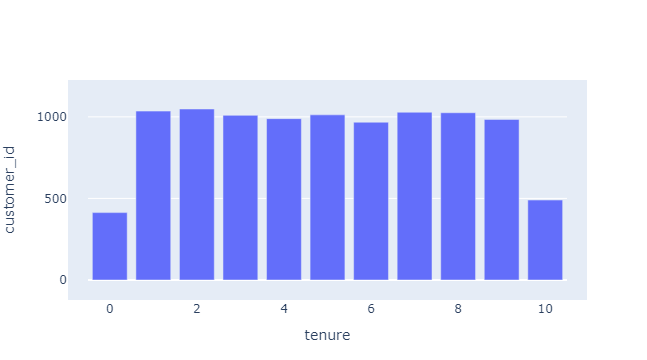

{'data': [{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
   'y': [413, 1035, 1048, 1009, 989, 1012, 967, 1028, 1025, 984, 490],
   'type': 'bar'}],
 'layout': {'template': {'data': {'histogram2dcontour': [{'type': 'histogram2dcontour',
      'colorbar': {'outlinewidth': 0, 'ticks': ''},
      'colorscale': [[0.0, '#0d0887'],
       [0.1111111111111111, '#46039f'],
       [0.2222222222222222, '#7201a8'],
       [0.3333333333333333, '#9c179e'],
       [0.4444444444444444, '#bd3786'],
       [0.5555555555555556, '#d8576b'],
       [0.6666666666666666, '#ed7953'],
       [0.7777777777777778, '#fb9f3a'],
       [0.8888888888888888, '#fdca26'],
       [1.0, '#f0f921']]}],
    'choropleth': [{'type': 'choropleth',
      'colorbar': {'outlinewidth': 0, 'ticks': ''}}],
    'histogram2d': [{'type': 'histogram2d',
      'colorbar': {'outlinewidth': 0, 'ticks': ''},
      'colorscale': [[0.0, '#0d0887'],
       [0.1111111111111111, '#46039f'],
       [0.2222222222222222, '#7201a8'],
       [0.333333333

In [53]:
plotly_graph.generate_plotly_graph(data_dict=chart_config)